In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
from skimage.color import rgb2gray
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import label, regionprops
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Folder dataset
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/Dataset Daun/train'

# Ambil semua nama file di folder
filenames = os.listdir(dataset_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images = []
valid_filenames = []

for f in filenames:
    path = os.path.join(dataset_folder, f)
    img = cv2.imread(path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img_rgb)
        valid_filenames.append(f)
    else:
        print(f"❌ Gagal membaca file: {f}")

❌ Gagal membaca file: Artocarpus Heterophyllus (Jackfruit)
❌ Gagal membaca file: Ficus Religiosa (Peepal Tree)


In [ ]:
def extract_color_features(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    H, S, V = cv2.split(hsv)
    return [np.mean(H), np.std(H), np.mean(S), np.std(S), np.mean(V), np.std(V)]

In [ ]:
def extract_texture_features(image):
    gray = rgb2gray(image)
    gray = (gray * 255).astype(np.uint8)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    return [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0]
    ]

In [ ]:
def extract_shape_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    label_img = label(thresh)
    props = regionprops(label_img)
    if props:
        largest_region = max(props, key=lambda x: x.area)
        area = largest_region.area
        perimeter = largest_region.perimeter if largest_region.perimeter != 0 else 1
        circularity = 4 * np.pi * area / (perimeter ** 2)
    else:
        area, perimeter, circularity = 0, 0, 0
    return [area, perimeter, circularity]


In [ ]:
def extract_all_features(image):
    return extract_color_features(image) + extract_texture_features(image) + extract_shape_features(image)

In [ ]:
feature_list = []
for img, fname in zip(images, valid_filenames):
    features = extract_all_features(img)
    feature_list.append([fname] + features)

In [ ]:
headers = ['filename',
           'mean_H', 'std_H', 'mean_S', 'std_S', 'mean_V', 'std_V',
           'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation',
           'area', 'perimeter', 'circularity']

df = pd.DataFrame(feature_list, columns=headers)
df.to_csv('extracted_features_daun_obat.csv', index=False)
print("✅ Ekstraksi fitur selesai")

# Tampilkan isi file di bawah ini
df_preview = pd.read_csv('extracted_features_daun_obat.csv')
df_preview.head()


✅ Ekstraksi fitur selesai dan disimpan dalam 'extracted_features_daun_obat.csv'


,filename,mean_H,std_H,mean_S,std_S,mean_V,std_V,contrast,dissimilarity,homogeneity,energy,correlation,area,perimeter,circularity
0,FR-S-011.jpg,12.714555,20.108815,43.529732,71.664457,204.713721,79.859790,90.691857,3.301360,0.746977,0.692112,0.993472,1356274.0,9813.721318,0.176966
1,FR-S-005.jpg,11.832191,19.022482,44.649786,73.046446,212.189816,69.117691,92.215992,3.397102,0.745023,0.702229,0.991408,1378966.0,9418.579182,0.195341
2,FR-S-003.jpg,12.014441,19.237108,42.103451,68.448277,211.203482,70.406309,99.498299,3.543579,0.739935,0.700494,0.991006,1377703.0,11763.343864,0.125113
3,FR-S-014.jpg,12.031793,19.221373,42.319233,68.887868,210.641532,70.959239,87.191458,3.434105,0.739370,0.697873,0.992199,1368649.0,9601.170019,0.186575
4,FR-S-006.jpg,9.975968,18.530141,37.904990,70.454940,220.159858,64.487137,21.838419,1.253597,0.824574,0.757703,0.997691,1481751.0,8805.517170,0.240146


from matplotlib import pyplot as plt
_df_0['mean_H'].plot(kind='hist', bins=20, title='mean_H')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std_H'].plot(kind='hist', bins=20, title='std_H')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mean_S'].plot(kind='hist', bins=20, title='mean_S')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['std_S'].plot(kind='hist', bins=20, title='std_S')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean_H', y='std_H', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std_H', y='mean_S', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='mean_S', y='std_S', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='std_S', y='mean_V', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean_H'].plot(kind='line', figsize=(8, 4), title='mean_H')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std_H'].plot(kind='line', figsize=(8, 4), title='std_H')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['mean_S'].plot(kind='line', figsize=(8, 4), title='mean_S')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['std_S'].plot(kind='line', figsize=(8, 4), title='std_S')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='mean_H', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='std_H', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='mean_S', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='std_S', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

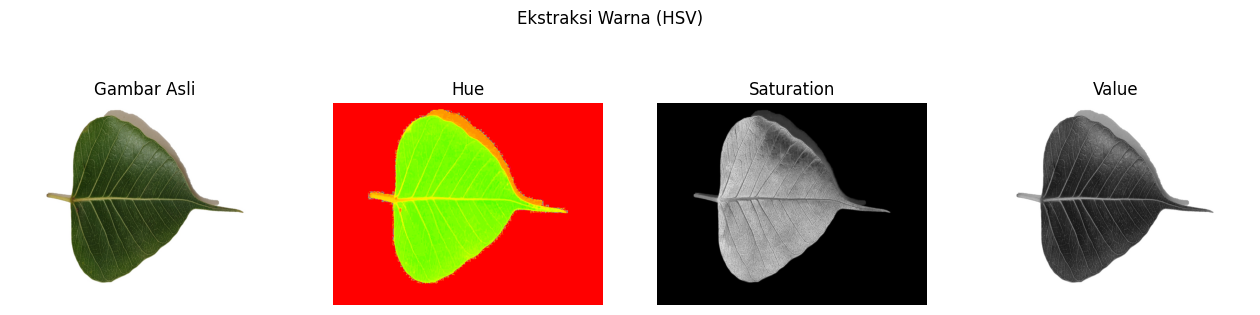

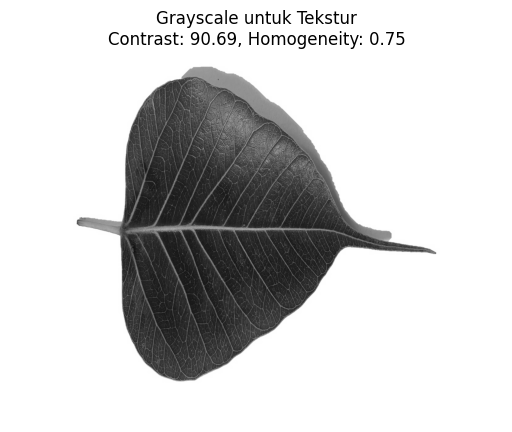

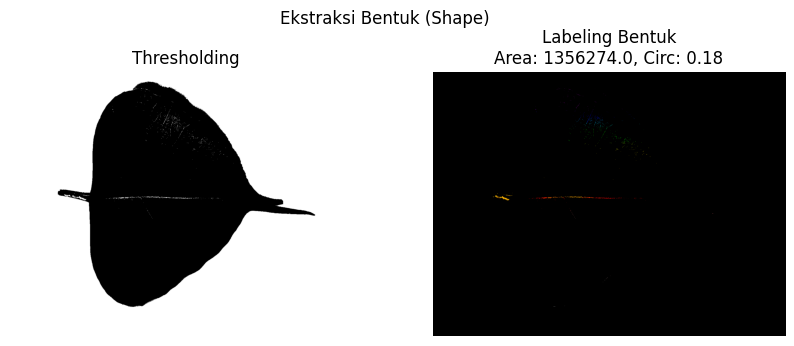

In [ ]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import label, regionprops
import cv2
import numpy as np

# Ambil 1 sample image
img = images[0]
filename = valid_filenames[0]

# 1. Warna (HSV)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(hsv)

# Tampilkan komponen HSV
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(img)
axs[0].set_title('Gambar Asli')
axs[1].imshow(H, cmap='hsv')
axs[1].set_title('Hue')
axs[2].imshow(S, cmap='gray')
axs[2].set_title('Saturation')
axs[3].imshow(V, cmap='gray')
axs[3].set_title('Value')
for ax in axs: ax.axis('off')
plt.suptitle("Ekstraksi Warna (HSV)")
plt.show()

# 2. Tekstur (GLCM)
gray = rgb2gray(img)
gray_u8 = (gray * 255).astype(np.uint8)

glcm = graycomatrix(gray_u8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

plt.imshow(gray_u8, cmap='gray')
plt.title(f"Grayscale untuk Tekstur\nContrast: {contrast:.2f}, Homogeneity: {homogeneity:.2f}")
plt.axis('off')
plt.show()

# 3. Bentuk (Shape)
gray_shape = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray_shape, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
label_img = label(thresh)
props = regionprops(label_img)

if props:
    region = max(props, key=lambda x: x.area)
    area = region.area
    perimeter = region.perimeter
    circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
else:
    area = perimeter = circularity = 0

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(thresh, cmap='gray')
axs[0].set_title("Thresholding")
axs[1].imshow(label_img, cmap='nipy_spectral')
axs[1].set_title(f"Labeling Bentuk\nArea: {area}, Circ: {circularity:.2f}")
for ax in axs: ax.axis('off')
plt.suptitle("Ekstraksi Bentuk (Shape)")
plt.show()